In [1]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

!pip install transformers==4.28.0

!pip install ktrain

This is a text cell...

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import ktrain
from ktrain import text

import pandas as pd
import numpy as np

In [4]:
#import os
#try:
#  import ktrain
#except:
#  !pip install ktrain
#  os.kill(os.getpid(), 9)



# Set your google colab runtime to use GPU, a must for deep learning!
# Runtime > Change Runtime Type > GPU

# The following code snippet will show you GPU information for your runtime.
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Load the data
#/content/drive/MyDrive/Supervised_Final_Project/news_category_trainingdata.json
reviews = pd.read_json("/content/drive/MyDrive/Supervised_Final_Project/news_category_trainingdata.json")

# Inspect the data
reviews.head()

# Prepare the data
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

# Update the labeling process
#########################################
reviews['wellness'] = np.where((reviews['category'].isin(['HEALTHY LIVING', 'WELLNESS'])), 1, 0)
#########################################

# Balance the data
# Create a balanced data set
#########################################
sample_amount = 1000

wellness = reviews[reviews['wellness'] == 1].sample(n=sample_amount)
not_wellness = reviews[reviews['wellness'] == 0].sample(n=sample_amount)

review_sample = pd.concat([wellness, not_wellness])
#########################################

review_sample.describe()

# On to Lab 2: Test, Tune and Save Models
target_names = ['NOT WELLNESS', 'WELLNESS']





Sun May 26 01:10:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--



Training model: bert

<module 'ktrain.text' from '/usr/local/lib/python3.10/dist-packages/ktrain/text/__init__.py'>
['AnswerExtractor', 'EnglishTranslator', 'SimpleQA', 'TextExtractor', 'Transformer', 'TransformerEmbedding', 'TransformerSummarizer', 'Translator', 'ZeroShotClassifier', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'data', 'eda', 'entities_from_array', 'entities_from_conll2003', 'entities_from_df', 'entities_from_gmb', 'entities_from_txt', 'extract_filenames', 'filter_by_id', 'get_topic_model', 'learner', 'load_text_files', 'load_topic_model', 'models', 'ner', 'pickle', 'predictor', 'preprocessor', 'print_sequence_taggers', 'print_text_classifiers', 'print_text_regression_models', 'qa', 'seqlen_stats', 'sequence_tagger', 'shallownlp', 'summarization', 'text_classifier', 'text_regression_model', 'textextractor', 'texts_from_array', 'texts_from_csv', 'texts_from_df', 'texts_from_folder', '

Is Multi-Label? False
preprocessing test...
language: en


Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


/usr/local/lib/python3.10/dist-packages/ktrain/__init__.py:100: UserWarning: For a GPU with 12GB of RAM, the following maxima apply:
        sequence len=64, max_batch_size=64
        sequence len=128, max_batch_size=32
        sequence len=256, max_batch_size=16
        sequence len=320, max_batch_size=14
        sequence len=384, max_batch_size=12
        sequence len=512, max_batch_size=6

        You've exceeded these limits.
        If using a GPU with <=12GB of memory, you may run out of memory during training.
        If necessary, adjust sequence length or batch size based on above.
  I.warnings.warn(msg)


simulating training for different learning rates... this may take a few moments...
Epoch 1/6
113/113 [==============================] - 1267s 11s/step - loss: 0.7077 - accuracy: 0.5089
Epoch 2/6
113/113 [==============================] - 1244s 11s/step - loss: 0.4925 - accuracy: 0.7683
Epoch 3/6
113/113 [==============================] - 1242s 11s/step - loss: 0.4885 - accuracy: 0.7578
Epoch 4/6
113/113 [==============================] - 1244s 11s/step - loss: 1.0951 - accuracy: 0.5272
Epoch 5/6
113/113 [==============================] - 221s 2s/step - loss: 3.8341 - accuracy: 0.4969


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


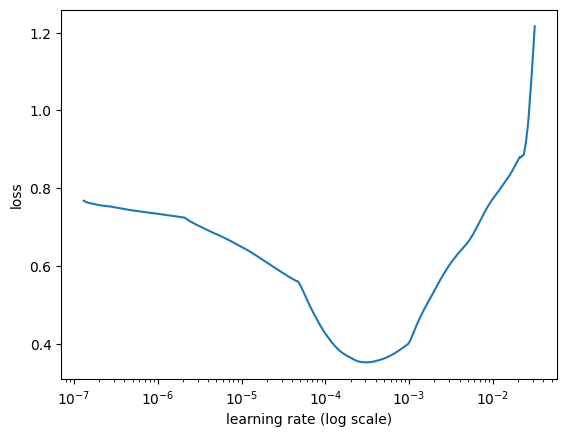

Suggested learning rate for bert: 3.109035023953766e-05



begin training using triangular learning rate policy with max lr of 3.109035023953766e-05...
Epoch 1/10
113/113 [==============================] - 1318s 11s/step - loss: 0.4237 - accuracy: 0.8111 - val_loss: 0.2447 - val_accuracy: 0.9100
Epoch 2/10
113/113 [==============================] - 1293s 11s/step - loss: 0.2187 - accuracy: 0.9211 - val_loss: 0.2811 - val_accuracy: 0.8950
Epoch 2: early stopping
Weights from best epoch have been loaded into model.
7/7 [==============================] - 49s 6s/step
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        87
           1       0.91      0.94      0.92       113

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Validation metrics for bert:
[[ 76  11]
 [  7 106]]

---------------------------
The probability this i

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 33
	95percentile : 58
	99percentile : 68


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 29
	95percentile : 54
	99percentile : 60


Is Multi-Label? False
maxlen is 512
done.
simulating training for different learning rates... this may take a few moments...
Epoch 1/6
112/112 [==============================] - 614s 5s/step - loss: 0.6828 - accuracy: 0.6239
Epoch 2/6
112/112 [==============================] - 599s 5s/step - loss: 0.4249 - accuracy: 0.8442
Epoch 3/6
112/112 [==============================] - 598s 5s/step - loss: 0.4380 - accuracy: 0.8004
Epoch 4/6
112/112 [==============================] - 598s 5s/step - loss: 0.9294 - accuracy: 0.5011
Epoch 5/6
112/112 [==============================] - 599s 5s/step - loss: 0.7650 - accuracy: 0.5073
Epoch 6/6
112/112 [==============================] - 599s 5s/step - loss: 0.8347 - accuracy: 0.4966


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


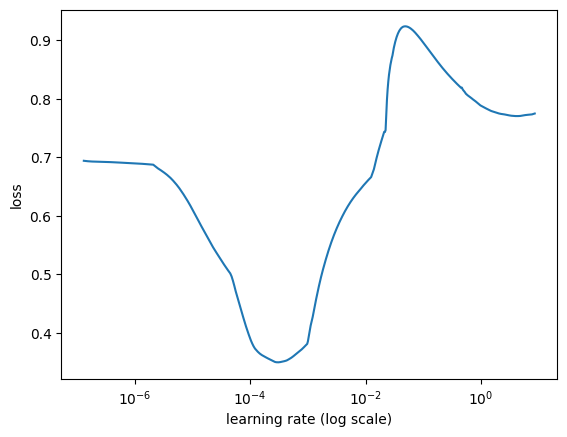

Suggested learning rate for distilbert: 2.993578091263771e-05



begin training using triangular learning rate policy with max lr of 2.993578091263771e-05...
Epoch 1/10
113/113 [==============================] - 617s 5s/step - loss: 0.4284 - accuracy: 0.8067 - val_loss: 0.3365 - val_accuracy: 0.8450
Epoch 2/10
113/113 [==============================] - 607s 5s/step - loss: 0.1866 - accuracy: 0.9400 - val_loss: 0.3185 - val_accuracy: 0.8700
Epoch 3/10
113/113 [==============================] - 607s 5s/step - loss: 0.0979 - accuracy: 0.9700 - val_loss: 0.3752 - val_accuracy: 0.8700
Epoch 3: early stopping
Weights from best epoch have been loaded into model.
7/7 [==============================] - 5s 472ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        92
           1       0.89      0.86      0.88       108

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted av

In [5]:
# Experimenting with different transformers
#models = ['distilbert', 'bert', 'roberta', 'distilroberta', 'albert', 'xlnet', 'electra', 'bart', 'gpt2']
models = {
    'bert': 'bert',
    'distilbert': 'distilbert'
    #'roberta': 'roberta', # does not work
    #'albert': 'albert', # does not work
    #'xlnet': 'xlnet', # does not work
    #'electra': 'electra', # does not work
    #'bart': 'bart', # does not work
    #'xlnet': 'xlnet', # does not work
    #'distilroberta': 'distilroberta', # does not work
    #'gpt2': 'gpt2' # does not work
}


for model_name, transformer_name in models.items():
    print(f"\n\nTraining model: {model_name}\n{'='*50}\n")

    # Reimport text to ensure it is not modified
    from ktrain import text

    # Print the text object and its attributes
    print(text)
    print(dir(text))

    # Data preparation
    train, val, preprocess = text.texts_from_df(
        review_sample,
        "combined_text",
        label_columns=["wellness"],
        val_pct=0.1,
        maxlen=512,
        preprocess_mode=model_name
    )

    # Model initialization
    model = text.text_classifier(transformer_name, train_data=train, preproc=preprocess, metrics=['accuracy'])
    learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=16)

    # Run learning rate finder
    learner.lr_find(max_epochs=6)
    learner.lr_plot()

    # Get the suggested learning rate
    suggested_lr = learner.lr_estimate()[1]
    print(f"Suggested learning rate for {model_name}: {suggested_lr}\n")

    # Train the model with early stopping
    history = learner.autofit(
        suggested_lr,  # Use the suggested learning rate
        checkpoint_folder='checkpoint',
        epochs=10,
        early_stopping=True
    )

    # Get the predictor
    predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

    # Validate the model
    validation = learner.validate(val_data=val, print_report=True)
    print(f"Validation metrics for {model_name}:\n{validation}\n")

    # Optional: Save the predictor
    predictor.save(f"drive/MyDrive/MSDSTextClassification_Lab2_{model_name}.wellness")

    # Inspecting the drivers of prediction for test docs
    test_docs = [
        'Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.',
        'Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.',
        'What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.',
        'Why We All Need to Have More Fun. Prioritizing fun may feel impossible.'
    ]

    for i, text in enumerate(test_docs):
        probs = predictor.predict(text, return_proba=True)
        print("---------------------------")
        print(f'The probability this is wellness for {model_name} is %s' % probs[1])
        print(text)

    print("\n\n")


In [6]:
validation = learner.validate(val_data=val, print_report=True)
print(validation)


7/7 [==============================] - 3s 456ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        92
           1       0.89      0.86      0.88       108

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

[[81 11]
 [15 93]]
